<a href="https://colab.research.google.com/github/Anamikarajesh/Library-Analysis/blob/main/LibraryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in the dataset: Index(['  Name ', 'Id ', 'Date ', 'In time', 'Out time', 'Total duration'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            132 non-null    object        
 1   Id              132 non-null    object        
 2   Date            132 non-null    datetime64[ns]
 3   In time         132 non-null    object        
 4   Out time        132 non-null    object        
 5   Total duration  132 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 6.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Name                132 non-null    object         
 1   Id                  

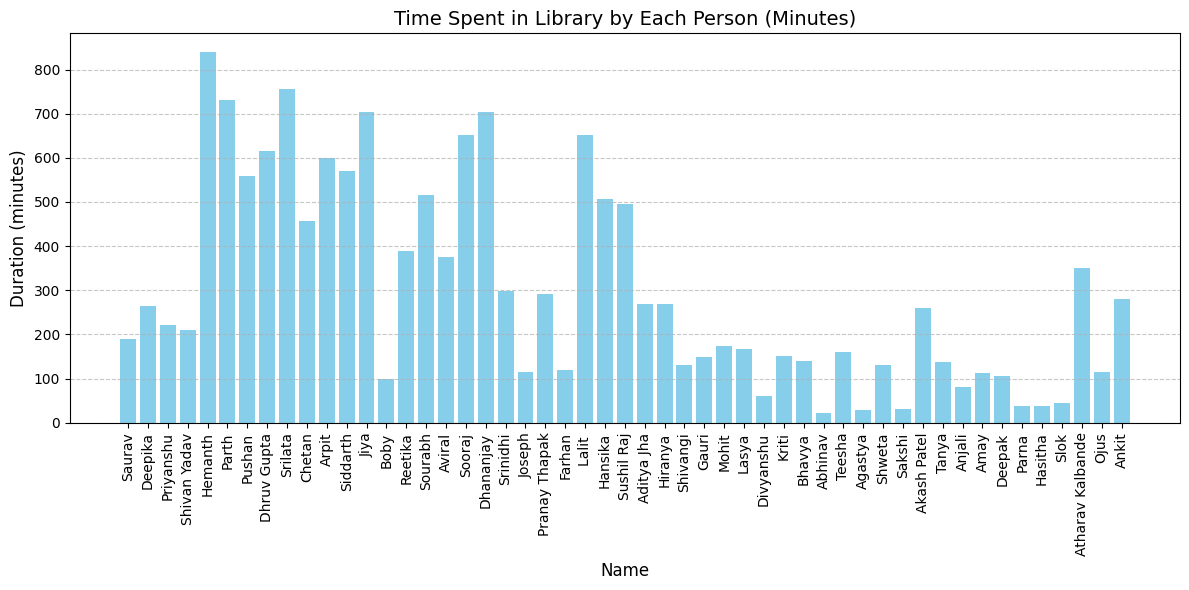

Average Time Spent in Library: 230.40 minutes (3.84 hours)

Person Who Studied the Most: Hemanth (0 days 14:00:00)


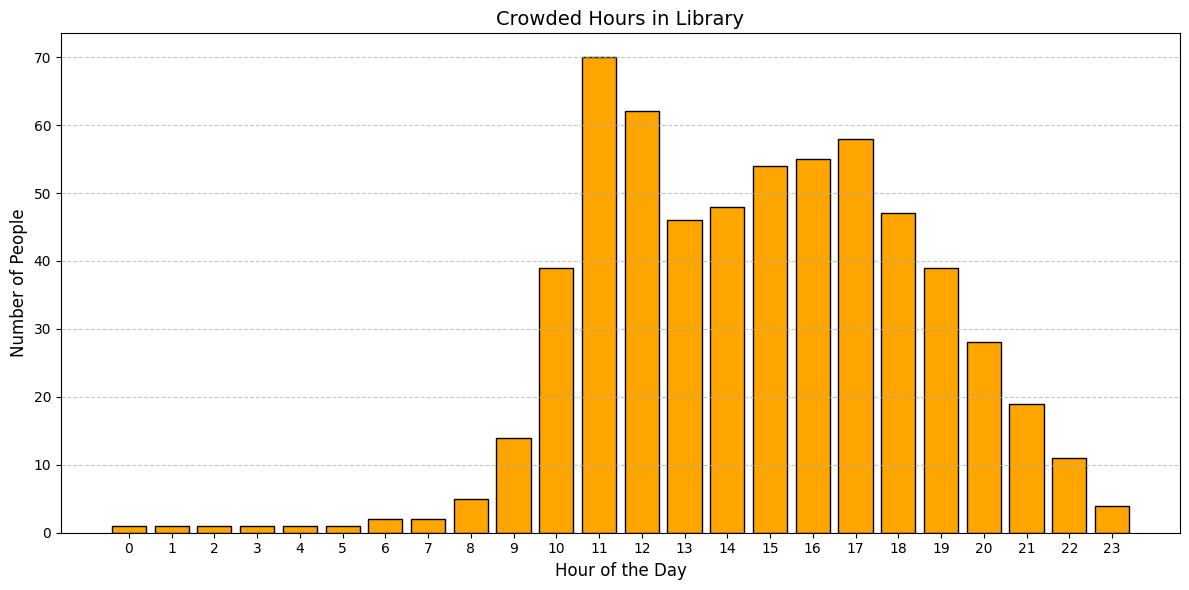


Most Crowded Time Period: 11:00 - 12:00 with 70 people.

Day with Most Attendance: 2025-01-07 with 30 students.


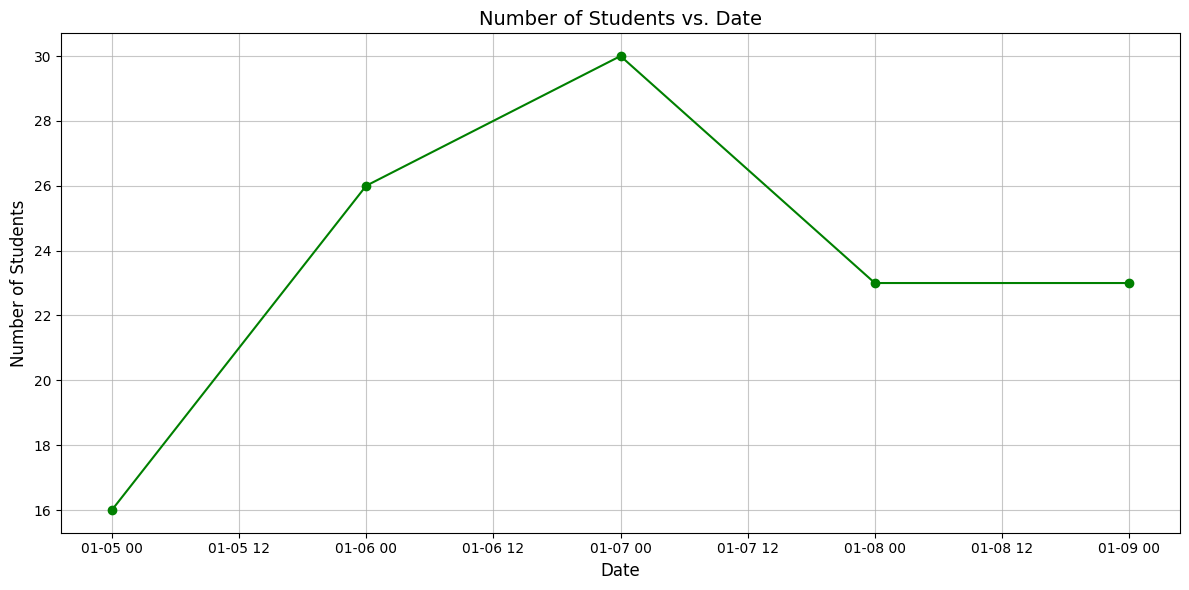

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "library record.xlsx"
data = pd.read_excel(file_path)

# Inspect column names and clean them
print("Columns in the dataset:", data.columns)
data.columns = data.columns.str.strip()

print(data.info())

# Convert time-related fields to proper formats
data['In time'] = pd.to_datetime(data['In time'], format='%H:%M:%S').dt.time
data['Out time'] = pd.to_datetime(data['Out time'], format='%H:%M:%S').dt.time
data['Total duration'] = pd.to_timedelta(data['Total duration'])
data['Date'] = pd.to_datetime(data['Date'])

# Convert durations to minutes and hours
data['Duration (minutes)'] = data['Total duration'].dt.total_seconds() / 60
data['Duration (hours)'] = data['Total duration'].dt.total_seconds() / 3600

print(data.info())

# 1. Plot the graph for time spent by each person
namecol = 'Name'
plt.figure(figsize=(12, 6))
plt.bar(data[namecol], data['Duration (minutes)'], color='skyblue')
plt.title('Time Spent in Library by Each Person (Minutes)', fontsize=14)
plt.xlabel('Name', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Calculate average time spent in the library
avgmin = data['Duration (minutes)'].mean()
avdhr = data['Duration (hours)'].mean()
print(f"Average Time Spent in Library: {avgmin:.2f} minutes ({avdhr:.2f} hours)")

# 3. Find who studied the most
moststudy = data.loc[data['Duration (minutes)'].idxmax()]
print(f"\nPerson Who Studied the Most: {moststudy[namecol]} ({moststudy['Total duration']})")

# 4. Find the most crowded time period
data['In hour'] = pd.to_datetime(data['In time'], format='%H:%M:%S').dt.hour
data['Out hour'] = pd.to_datetime(data['Out time'], format='%H:%M:%S').dt.hour

# Count the number of people present during each hour
hours = list(range(24))
crowdedhr = {hour: 0 for hour in hours}

for _, row in data.iterrows():
    in_hour = row['In hour']
    out_hour = row['Out hour']
    for hour in range(in_hour, out_hour + 1):
        crowdedhr[hour] += 1

crowdedhr = sorted(crowdedhr.items(), key=lambda x: x[0])

# Plot crowded hours
plt.figure(figsize=(12, 6))
plt.bar([hour for hour, _ in crowdedhr], [count for _, count in crowdedhr],
        color='orange', edgecolor='black', width=0.8)
plt.title('Crowded Hours in Library', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

most_crowded_hour = max(crowdedhr, key=lambda x: x[1])
print(f"\nMost Crowded Time Period: {most_crowded_hour[0]}:00 - {most_crowded_hour[0]+1}:00 "
      f"with {most_crowded_hour[1]} people.")

# 5. Find the day with the most attendance
attendance_per_day = data.groupby('Date')[namecol].nunique().reset_index()
attendance_per_day.columns = ['Date', 'Number of Students']

most_attended_day = attendance_per_day.loc[attendance_per_day['Number of Students'].idxmax()]
print(f"\nDay with Most Attendance: {most_attended_day['Date'].date()} "
      f"with {most_attended_day['Number of Students']} students.")

# Plot number of students vs date
plt.figure(figsize=(12, 6))
plt.plot(attendance_per_day['Date'], attendance_per_day['Number of Students'], marker='o', color='green')
plt.title('Number of Students vs. Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()
